<a href="https://colab.research.google.com/github/gitmattalves/Regressao_Linear/blob/main/Exercicio_Regressao_Linear_Alura_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Data Science - Regressão Linear
##Conhecendo o Dataset

**Descrição:**

Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

##O Dataset e o Projeto

Fonte: https://www.kaggle.com/greenwing1985/housepricing¶


Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.


**Dados:**

precos - Preços do imóveis

area - Área do imóvel

garagem - Número de vagas de garagem

banheiros - Número de banheiros

lareira - Número de lareiras

marmore - Se o imóvel possui acabamento em mármore branco (1) ou não (0)

andares - Se o imóvel possui mais de um andar (1) ou não (0)

##Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [63]:
dados = pd.read_csv('/content/sample_data/HousePrices_HalfMil.csv', sep=';')

## Visualizar dados

In [64]:
dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


## Verificando o tamanhp do Dataset

In [65]:
dados.shape

(1000, 7)

In [66]:
dados.dtypes

precos       int64
area         int64
garagem      int64
banheiros    int64
lareira      int64
marmore      int64
andares      int64
dtype: object

# Análises Preliminares


##Estatísticas descritivas

In [67]:
dados.describe().round()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,41986.0,124.0,2.0,3.0,2.0,0.0,0.0
std,12140.0,72.0,1.0,1.0,1.0,0.0,1.0
min,13150.0,1.0,1.0,1.0,0.0,0.0,0.0
25%,33112.0,61.0,1.0,2.0,1.0,0.0,0.0
50%,41725.0,123.0,2.0,3.0,2.0,0.0,0.0
75%,51175.0,187.0,3.0,4.0,3.0,1.0,1.0
max,73675.0,249.0,3.0,5.0,4.0,1.0,1.0


**Matriz de correlação**

O coeficiente de correlação é uma medida de associação linear entre duas variáveis e situa-se entre -1 e +1. Sendo que -1 indica associação negativa perfeita e +1 indica associação positiva perfeita.

**Observe as correlações entre as variáveis:**

* Quais são mais correlacionadas com a variável dependete 
(Preço)?

* Qual o relacionamento entre elas (positivo ou negativo)?
* Existe correlação forte entre as variáveis explicativas?

In [68]:
dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


Plotando o gráfico para uma melhor visualização da correlação entre as variáveis. 

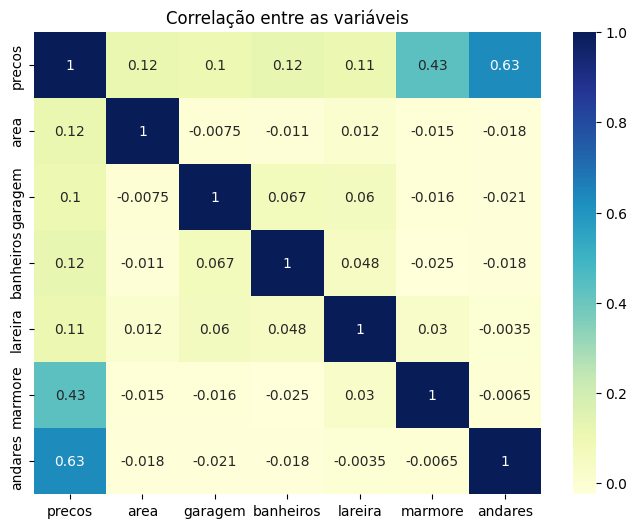

In [69]:
correlacao = dados.corr().round(4)

ax = plt.figure(figsize=(18,6))

ax = plt.subplot(1,2,1)
ax = sns.heatmap(correlacao, annot=True, cmap= "YlGnBu")
plt.title("Correlação entre as variáveis")

plt.show()

* Forte correlação positiva entre preço e andares e considerálvel correlação entre preços e mármore


## **Comportamento da Variável Dependente**

### **Análise Gráficas**

Alterando o estilo e cor dos gráficos da biblioteca seaborn

In [93]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

Box plot da variável dependente

**O objetivo é avaliar o comportamento da distribuição da variável dependente:**
* Parecem existir valores discrepantes (outliers)?

* O box plot apresenta alguma tendência?

<Axes: title={'center': 'Preço dos Imóveis'}, ylabel='Valores'>

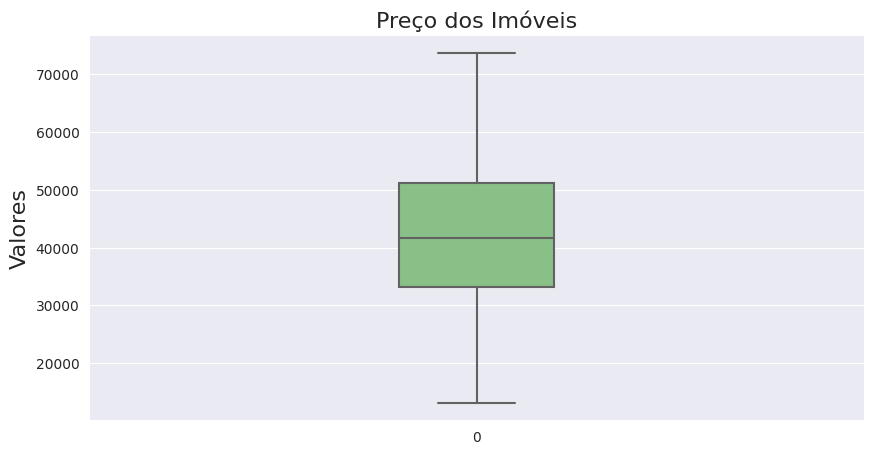

In [94]:
ax = sns.boxplot(data=dados['precos'], width=0.2)
ax.figure.set_size_inches(10,5)
ax.set_title('Preço dos Imóveis', fontsize=16)
ax.set_ylabel('Valores', fontsize=16)
ax

**Investigando a variável dependente (y) juntamente com outras característica**

Box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

O objetivo é avaliar o comportamento da distribuição da variável dependente com cada variável explicativa categórica:

* As estatísticas apresentam mudança significativa entre as categorias?

* O box plot apresenta alguma tendência bem definida?

**Box-plot (Preço X Garagem)**

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Garagem', ylabel='Valores'>

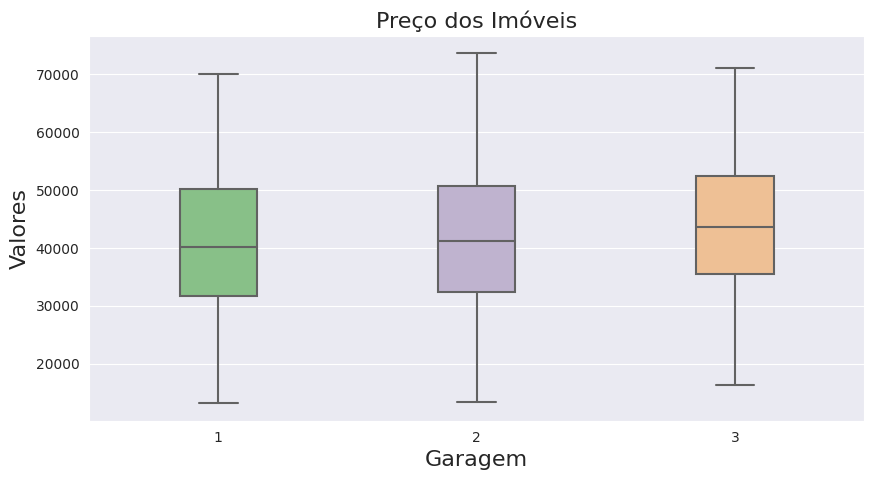

In [95]:
ax = sns.boxplot(data=dados, y='precos', x='garagem', orient='v', width=0.3)
ax.figure.set_size_inches(10,5)
ax.set_title('Preço dos Imóveis', fontsize=16)
ax.set_ylabel('Valores', fontsize=16)
ax.set_xlabel('Garagem', fontsize=16)
ax

**Box-plot (Preço X Banheiros)**

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Banheiros', ylabel='Valores'>

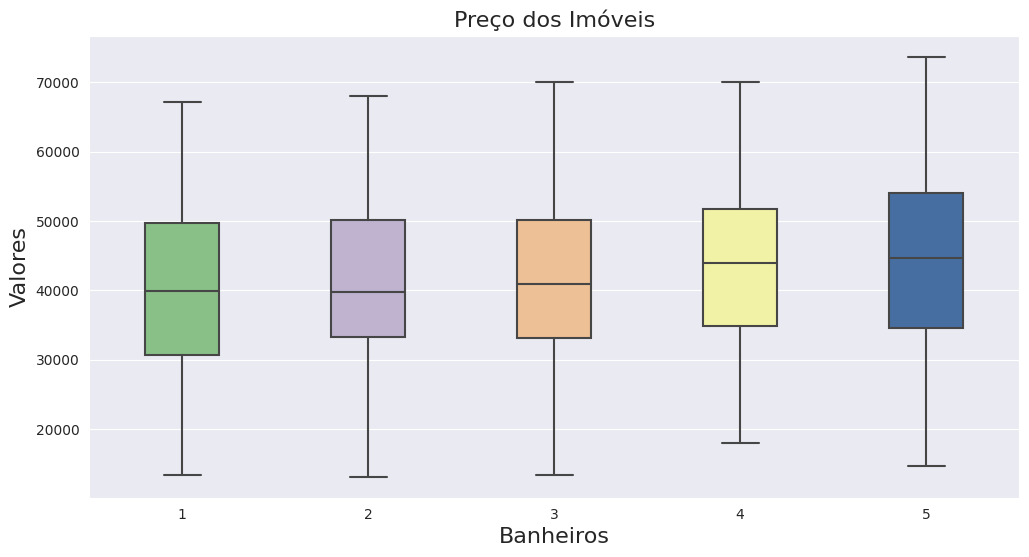

In [96]:
ax = sns.boxplot(y='precos', x='banheiros', data=dados, orient='v', width=0.4)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos Imóveis', fontsize=16)
ax.set_ylabel('Valores', fontsize=16)
ax.set_xlabel('Banheiros', fontsize=16)
ax

**Box-plot (Preço X Lareira)**

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Lareira', ylabel='Valores'>

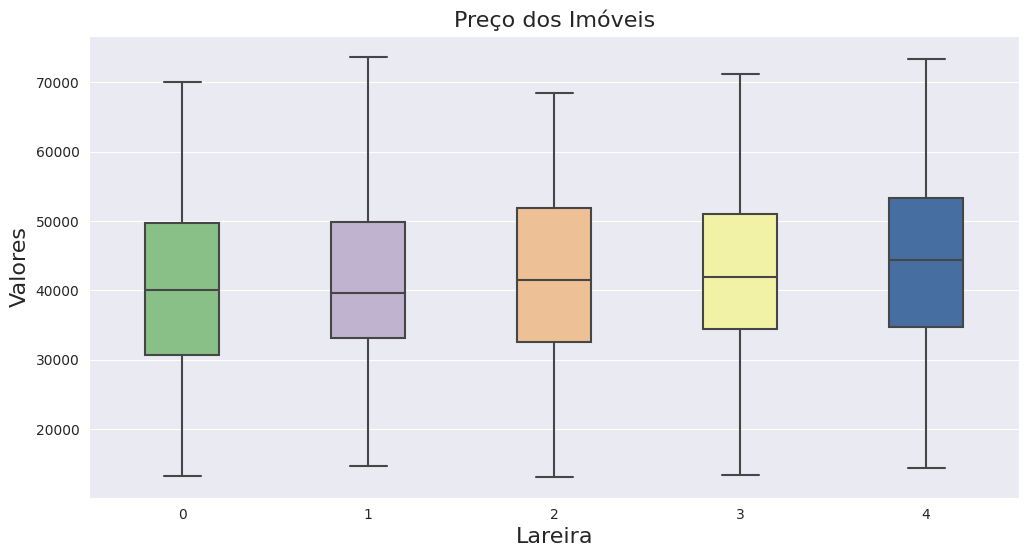

In [97]:
ax = sns.boxplot(y='precos', x='lareira', data=dados, orient='v', width=0.4)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos Imóveis', fontsize=16)
ax.set_ylabel('Valores', fontsize=16)
ax.set_xlabel('Lareira', fontsize=16)
ax

**Box-plot (Preço X Acabamento em Mármore)**

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Acabamento com Mármore', ylabel='Valores'>

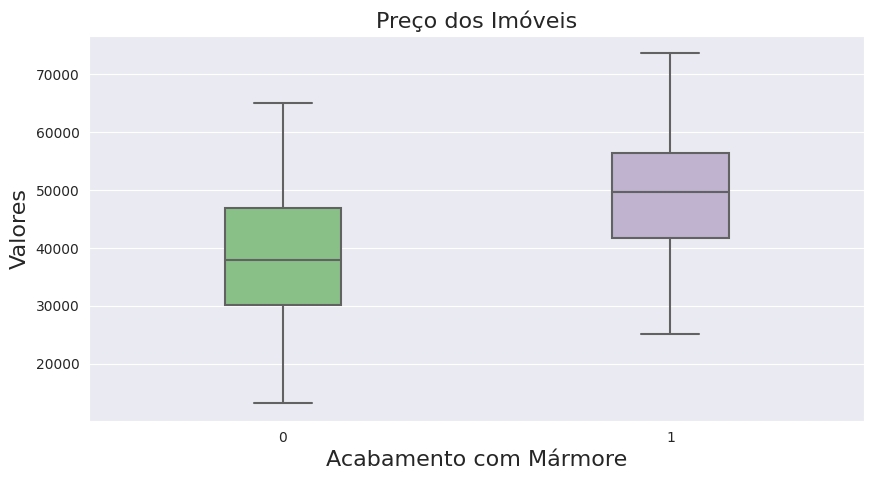

In [98]:
ax = sns.boxplot(y='precos', x='marmore', data=dados, orient='v', width=0.3)
ax.figure.set_size_inches(10,5)
ax.set_title('Preço dos Imóveis', fontsize=16)
ax.set_ylabel('Valores', fontsize=16)
ax.set_xlabel('Acabamento com Mármore', fontsize=16)
ax

**Box-plot (Preço X Andares)**

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Imóvel com Andares', ylabel='Valores'>

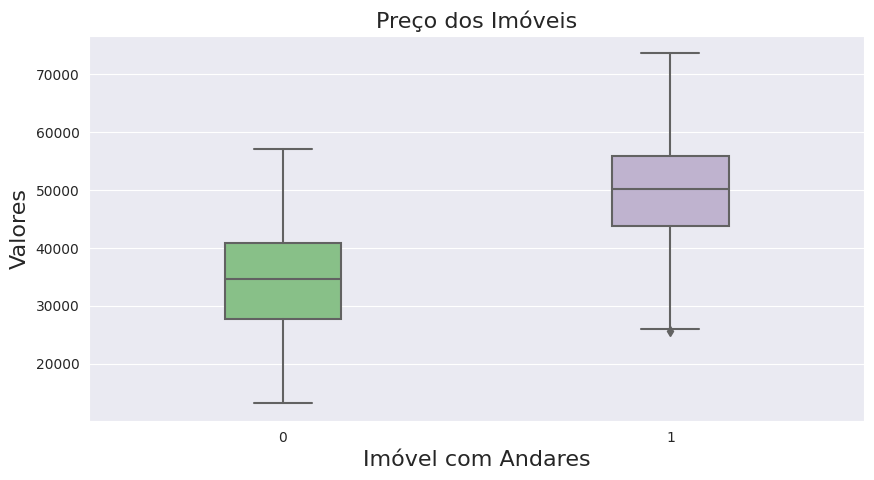

In [99]:
ax = sns.boxplot(y='precos', x='andares', data=dados, orient='v', width=0.3)
ax.figure.set_size_inches(10,5)
ax.set_title('Preço dos Imóveis', fontsize=16)
ax.set_ylabel('Valores', fontsize=16)
ax.set_xlabel('Imóvel com Andares', fontsize=16)
ax

**Distribuição de frequências da variável dependente (y)**

Construa um histograma da variável dependente (Preço).

Avalie:
* A distribuição de frequências da variável dependente parece ser assimétrica?
* É possível supor que a variável dependente segue uma distribuição normal?

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='precos', ylabel='Valores dos Imóveis'>

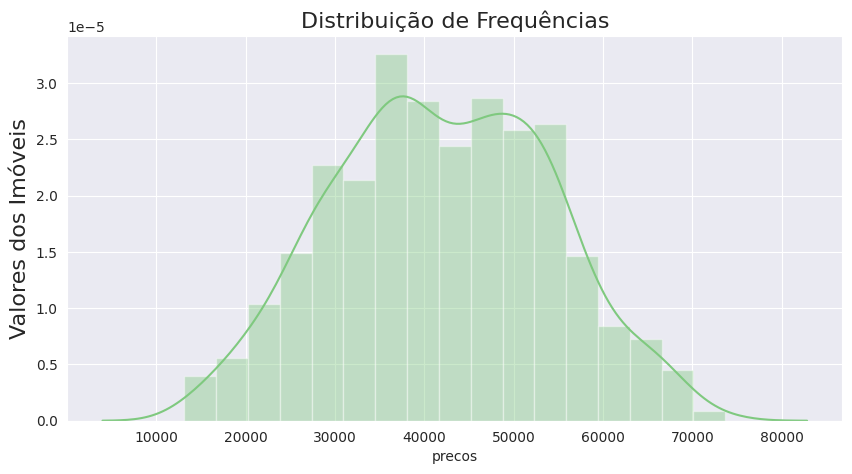

In [100]:
ax = sns.distplot(dados['precos'])
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição de Frequências', fontsize=16)
ax.set_ylabel('Valores dos Imóveis', fontsize=16)
ax

## **Gráficos de dispersão entre as variáveis do dataset**



**Plotando o pairplot fixando somente uma variável no eixo y**


Plotando o gráficos de dispersão da variável dependente contra cada variável explicativa. Utilizando o pairplot da biblioteca seaborn para isso.



**Avalie:**
* É possível identificar alguma relação linear entre as variáveis?
* A relação é positiva ou negativa?
Compare com os resultados obtidos na matriz de correlação.

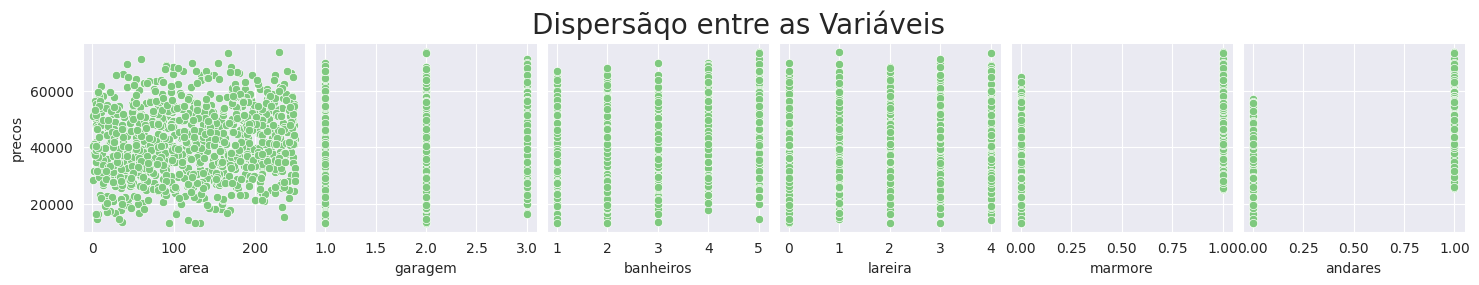

In [101]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'])
ax.fig.suptitle('Dispersãqo entre as Variáveis', fontsize=20, y=1.1)
ax

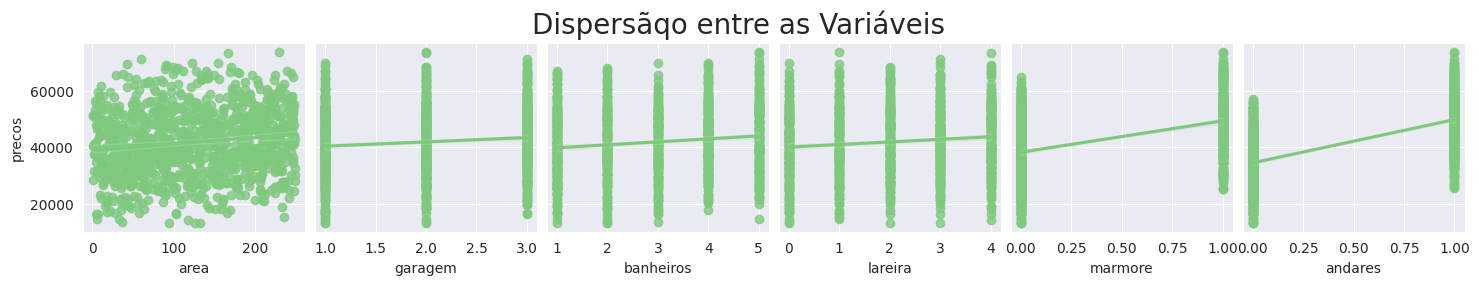

In [102]:
# Utilindao o parâmetro kind='reg'

ax = sns.pairplot(dados, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind='reg')
ax.fig.suptitle('Dispersãqo entre as Variáveis', fontsize=20, y=1.1)
ax

#Estimando um Modelo de Regressão Linear

**Importando o train_test_split da biblioteca scikit-learn**

In [103]:
from sklearn.model_selection import train_test_split

**Criando uma Series (pandas) para armazenar a variável dependente (y)**

In [104]:
y = dados['precos']

**Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)**

In [105]:
X = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

**Criando os datasets de treino e de teste**

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

##Importando LinearRegression e metrics da biblioteca scikit-learn

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Instanciando a classe LinearRegression()**

In [108]:
modelo = LinearRegression()

**Utilizando o método fit() para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)**

In [109]:
modelo.fit(X_train, y_train)

LinearRegression()

## **Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO**

**Avaliar:**

* O modelo apresenta um bom ajuste?

* Qual medida podemos tomar para melhorar essa estatística?

In [110]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.64


**Gerando previsões para os dados de TESTE (X_test) utilizando o método predict()**

In [111]:
y_previsto = modelo.predict(X_test)

**Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo**

In [112]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.67


# Obtendo Previsões Pontuais


**Criando um simulador simples**

Simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.


In [113]:
area = 38
garagem = 2 
banheiros = 4
lareira = 4
marmore = 0
andares = 1
entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(modelo.predict(entrada)[0]))

$ 46389.80


## Métricas de Regressão

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:


**Obtendo métricas para o modelo **

In [114]:
EQM_2 = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2_2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métrics'])

,Métrics
EQM,50197019.50
REQM,7084.99
R²,0.67


**Importando a biblioteca pickle**

In [115]:
import pickle

**Salvando o modelo estimado**

In [116]:
output = open('modelo_precos_imoveis', 'wb')
pickle.dump(modelo, output)
output.close()